In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

In [2]:
def affine_transform(image, A, a0, interpolation='nearest'):
    """
    Führt eine affine Transformation auf ein Bild durch.
    
    Parameter:
    image: np.array - Eingabebild (Grauwert oder Farbe)
    A: np.array - 2x2 Transformationsmatrix
    a0: np.array - 2x1 Verschiebungsvektor
    interpolation: str - Interpolationsmethode ('nearest')
    
    Rückgabe:
    transformed_image: np.array - Transformiertes Bild
    """
    
    # Bilddimensionen
    h, w = image.shape[:2]
    
    # Inverse der Transformationsmatrix
    A_inv = np.linalg.inv(A)
    
    # Berechnung der neuen Bildgröße
    new_w, new_h = w * 2, h * 2  # Hier kann das Bild ggf. vergrößert werden
    transformed_image = np.zeros((new_h, new_w, image.shape[2]) if len(image.shape) == 3 else (new_h, new_w), dtype=image.dtype)

    # Transformationsdurchführung
    for y in range(new_h):
        for x in range(new_w):
            # Transformation ins Original-Koordinatensystem
            orig_coords = np.dot(A_inv, np.array([x, y]) - a0)
            orig_x, orig_y = orig_coords
            
            # Nächster Nachbar-Interpolation
            if interpolation == 'nearest':
                nearest_x, nearest_y = int(round(orig_x)), int(round(orig_y))
                if 0 <= nearest_x < w and 0 <= nearest_y < h:
                    transformed_image[y, x] = image[nearest_y, nearest_x]
    
    return transformed_image


    

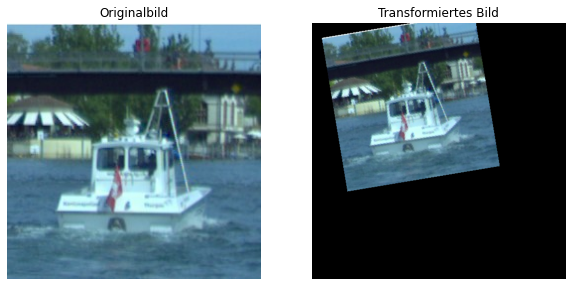

In [3]:
# Beispielbild laden
image = cv2.imread('example.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Affine Transformationsparameter definieren
A = np.array([[1.2, 0.2], [-0.2, 1.2]])  # Skalierung + leichte Scherung
a0 = np.array([20, 30])  # Verschiebung

# Transformation durchführen
transformed_image = affine_transform(image, A, a0)

# Ergebnis anzeigen
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Originalbild")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Transformiertes Bild")
plt.imshow(transformed_image)
plt.axis("off")

plt.show()

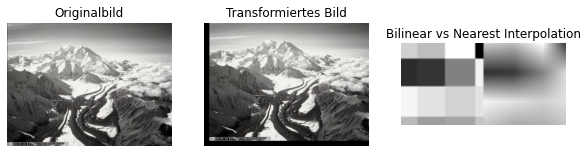

In [ ]:
def affine_transform(image, A, a0, interpolation='nearest'):
    """
    Führt eine affine Transformation auf ein Bild durch.
    
    Parameter:
    image: np.array - Eingabebild (Grauwert oder Farbe)
    A: np.array - 2x2 Transformationsmatrix
    a0: np.array - 2x1 Verschiebungsvektor
    interpolation: str - Interpolationsmethode ('nearest', 'bilinear')
    
    Rückgabe:
    transformed_image: np.array - Transformiertes Bild
    """
    
    # Bilddimensionen
    h, w = image.shape[:2]
    
    # Inverse der Transformationsmatrix
    A_inv = np.linalg.inv(A)
    
    # Berechnung der neuen Bildgröße
    new_w, new_h = w, h  # Hier kann das Bild ggf. vergrößert werden
    transformed_image = np.zeros((new_h, new_w, image.shape[2]) if len(image.shape) == 3 else (new_h, new_w), dtype=image.dtype)
    
    # Transformationsdurchführung
    for y in range(new_h):
        for x in range(new_w):
            # Transformation ins Original-Koordinatensystem
            orig_coords = np.dot(A_inv, np.array([x, y]) - a0)
            orig_x, orig_y = orig_coords
            
            if interpolation == 'nearest':
                nearest_x, nearest_y = int(round(orig_x)), int(round(orig_y))
                if 0 <= nearest_x < w and 0 <= nearest_y < h:
                    transformed_image[y, x] = image[nearest_y, nearest_x]
            elif interpolation == 'bilinear':
                x0, y0 = int(np.floor(orig_x)), int(np.floor(orig_y))
                x1, y1 = x0 + 1, y0 + 1
                
                if 0 <= x0 < w and 0 <= y0 < h:
                    A1 = (x1 - orig_x) * (y1 - orig_y)
                    A2 = (orig_x - x0) * (y1 - orig_y)
                    A3 = (x1 - orig_x) * (orig_y - y0)
                    A4 = (orig_x - x0) * (orig_y - y0)
                    
                    gX = 0
                    if 0 <= x0 < w and 0 <= y0 < h:
                        gX += A1 * image[y0, x0]
                    if 0 <= x1 < w and 0 <= y0 < h:
                        gX += A2 * image[y0, x1]
                    if 0 <= x0 < w and 0 <= y1 < h:
                        gX += A3 * image[y1, x0]
                    if 0 <= x1 < w and 0 <= y1 < h:
                        gX += A4 * image[y1, x1]
                    
                    transformed_image[y, x] = gX
    
    return transformed_image

def convert_left_to_right(h, y):
    return h - y - 1

def convert_right_to_left(h, y):
    return h - y - 1

def full_affine_transform(image, A, a0, interpolation='nearest'):
    h, w = image.shape[:2]
    transformed_image = np.zeros_like(image)
    
    for y in range(h):
        for x in range(w):
            y_right = convert_left_to_right(h, y)
            orig_coords = np.dot(np.linalg.inv(A), np.array([x, y_right]) - a0)
            orig_x, orig_y = orig_coords
            orig_y = convert_right_to_left(h, orig_y)
            
            if interpolation == 'nearest':
                nearest_x, nearest_y = int(round(orig_x)), int(round(orig_y))
                if 0 <= nearest_x < w and 0 <= nearest_y < h:
                    transformed_image[y, x] = image[nearest_y, nearest_x]
    
    return transformed_image

# Beispielbild laden
gletscher = cv2.imread('gletscher.jpg', cv2.IMREAD_COLOR)
gletscher = cv2.cvtColor(gletscher, cv2.COLOR_BGR2RGB)

# Translation um 20 Pixel diagonal nach rechts unten in rechtshändigem KS
A_identity = np.array([[1, 0], [0, 1]])
a0_translation = np.array([20, -20])

# Transformation durchführen
gletscher_transformed = full_affine_transform(gletscher, A_identity, a0_translation)

# Test der bilinearen Interpolation mit Skalierung um Faktor 10.5
small_image = np.random.randint(0, 255, (30, 30), dtype=np.uint8)
A_scale = np.array([[10.5, 0], [0, 10.5]])
a0_zero = np.array([0, 0])

nearest_scaled = affine_transform(small_image, A_scale, a0_zero, interpolation='nearest')
bilinear_scaled = affine_transform(small_image, A_scale, a0_zero, interpolation='bilinear')

# Ergebnisse anzeigen
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Originalbild")
plt.imshow(gletscher)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Transformiertes Bild")
plt.imshow(gletscher_transformed)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Bilinear vs Nearest Interpolation")
plt.imshow(np.hstack((nearest_scaled, bilinear_scaled)), cmap='gray')
plt.axis("off")

plt.show()

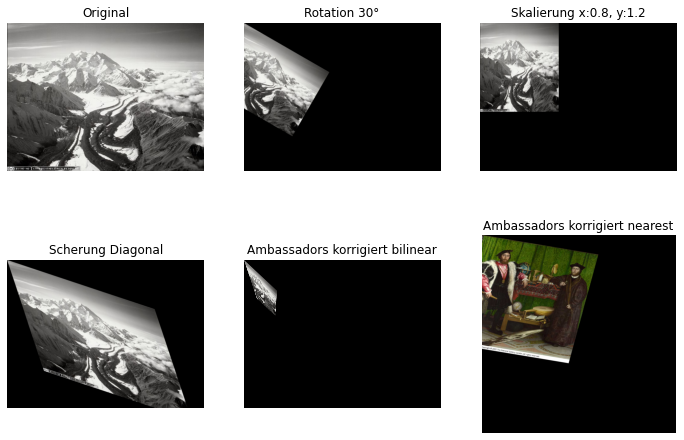

In [ ]:
def affine_transform(image, A, a0, interpolation='nearest'):
    """
    Führt eine affine Transformation auf ein Bild durch.
    
    Parameter:
    image: np.array - Eingabebild (Grauwert oder Farbe)
    A: np.array - 2x2 Transformationsmatrix
    a0: np.array - 2x1 Verschiebungsvektor
    interpolation: str - Interpolationsmethode ('nearest', 'bilinear')
    
    Rückgabe:
    transformed_image: np.array - Transformiertes Bild
    """
    
    # Bilddimensionen
    h, w = image.shape[:2]
    
    # Inverse der Transformationsmatrix
    A_inv = np.linalg.inv(A)
    
    # Berechnung der neuen Bildgröße
    new_w, new_h = w * 2, h * 2  # Hier kann das Bild ggf. vergrößert werden
    transformed_image = np.zeros((new_h, new_w, image.shape[2]) if len(image.shape) == 3 else (new_h, new_w), dtype=image.dtype)
    
    # Transformationsdurchführung
    for y in range(new_h):
        for x in range(new_w):
            # Transformation ins Original-Koordinatensystem
            orig_coords = np.dot(A_inv, np.array([x, y]) - a0)
            orig_x, orig_y = orig_coords
            
            if interpolation == 'nearest':
                nearest_x, nearest_y = int(round(orig_x)), int(round(orig_y))
                if 0 <= nearest_x < w and 0 <= nearest_y < h:
                    transformed_image[y, x] = image[nearest_y, nearest_x]
            elif interpolation == 'bilinear':
                x0, y0 = int(np.floor(orig_x)), int(np.floor(orig_y))
                x1, y1 = x0 + 1, y0 + 1
                
                if 0 <= x0 < w and 0 <= y0 < h:
                    A1 = (x1 - orig_x) * (y1 - orig_y)
                    A2 = (orig_x - x0) * (y1 - orig_y)
                    A3 = (x1 - orig_x) * (orig_y - y0)
                    A4 = (orig_x - x0) * (orig_y - y0)
                    
                    gX = 0
                    if 0 <= x0 < w and 0 <= y0 < h:
                        gX += A1 * image[y0, x0]
                    if 0 <= x1 < w and 0 <= y0 < h:
                        gX += A2 * image[y0, x1]
                    if 0 <= x0 < w and 0 <= y1 < h:
                        gX += A3 * image[y1, x0]
                    if 0 <= x1 < w and 0 <= y1 < h:
                        gX += A4 * image[y1, x1]
                    
                    transformed_image[y, x] = gX
    
    return transformed_image

def rotate_image(image, angle):
    rad = np.radians(angle)
    A = np.array([[np.cos(rad), -np.sin(rad)], [np.sin(rad), np.cos(rad)]])
    return affine_transform(image, A, np.array([0, 0]))

def scale_image(image, scale_x, scale_y):
    A = np.array([[scale_x, 0], [0, scale_y]])
    return affine_transform(image, A, np.array([0, 0]))

def shear_diagonal(image, scale_diag, scale_ortho):
    A = np.array([[scale_diag, scale_ortho], [scale_ortho, scale_diag]])
    return affine_transform(image, A, np.array([0, 0]))

# Beispielbilder laden
gletscher = cv2.imread('gletscher.jpg', cv2.IMREAD_COLOR)
gletscher = cv2.cvtColor(gletscher, cv2.COLOR_BGR2RGB)
ambassadors = cv2.imread('ambassadors.jpg', cv2.IMREAD_COLOR)
ambassadors = cv2.cvtColor(ambassadors, cv2.COLOR_BGR2RGB)

# Transformationen durchführen
gletscher_rotated = rotate_image(gletscher, 30)
gletscher_scaled = scale_image(gletscher, 0.8, 1.2)
gletscher_sheared = shear_diagonal(gletscher, 1.5, 0.5)

# Manuelle Korrektur für die Entzerrung des Ambassadors-Bildes
def custom_correction(image, interpolation="bilinear"):
    A = np.array([[0, 0], [0.2, 1.1]])
    return affine_transform(image, A, np.array([0, 0]), interpolation)

ambassadors_corrected_bilinear = custom_correction(ambassadors, "bilinear")
ambassadors_corrected_nearest = custom_correction(ambassadors, "nearest")

gletscher_all = rotate_image(gletscher, 30)
gletscher_all = scale_image(gletscher_all, 0.8, 1.2)
gletscher_all = shear_diagonal(gletscher_all, 1.5, 0.5)

# Ergebnisse anzeigen
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1)
plt.title("Original")
plt.imshow(gletscher)
plt.axis("off")

plt.subplot(2,3,2)
plt.title("Rotation 30°")
plt.imshow(gletscher_rotated)
plt.axis("off")

plt.subplot(2,3,3)
plt.title("Skalierung x:0.8, y:1.2")
plt.imshow(gletscher_scaled)
plt.axis("off")

plt.subplot(2,3,4)
plt.title("Scherung Diagonal")
plt.imshow(gletscher_sheared)
plt.axis("off")

plt.subplot(2,3,5)
plt.title("Ambassadors korrigiert bilinear")
plt.imshow(gletscher_all)
plt.axis("off")

plt.subplot(2,3,6)
plt.title("Ambassadors korrigiert nearest")
plt.imshow(ambassadors_corrected_nearest)
plt.axis("off")

plt.show()


In [16]:

ambassadors = cv2.imread('ambassadors.jpg', cv2.IMREAD_COLOR)
ambassadors = cv2.cvtColor(ambassadors, cv2.COLOR_BGR2RGB)



# Manuelle Korrektur für die Entzerrung des Ambassadors-Bildes
def custom_correction(image, interpolation="bilinear"):
    A = np.array([[0.1, -0.1], [0.2,0.1]])
    return affine_transform(image, A, np.array([0, 0]), interpolation)


ambassadors_corrected_bilinear = custom_correction(ambassadors, "bilinear")
ambassadors_corrected_nearest = custom_correction(ambassadors, "nearest")


Homographie-Matrix:
 [[ 1.17458780e+00  1.22510770e+00 -8.84805621e+02]
 [ 5.59515186e-01  1.76735749e+00 -1.00744706e+03]
 [-5.92648744e-04 -8.10653199e-04  1.00000000e+00]]
Homographie-Matrix:
 [[ 1.17458780e+00  1.22510770e+00 -8.84805621e+02]
 [ 5.59515186e-01  1.76735749e+00 -1.00744706e+03]
 [-5.92648744e-04 -8.10653199e-04  1.00000000e+00]]


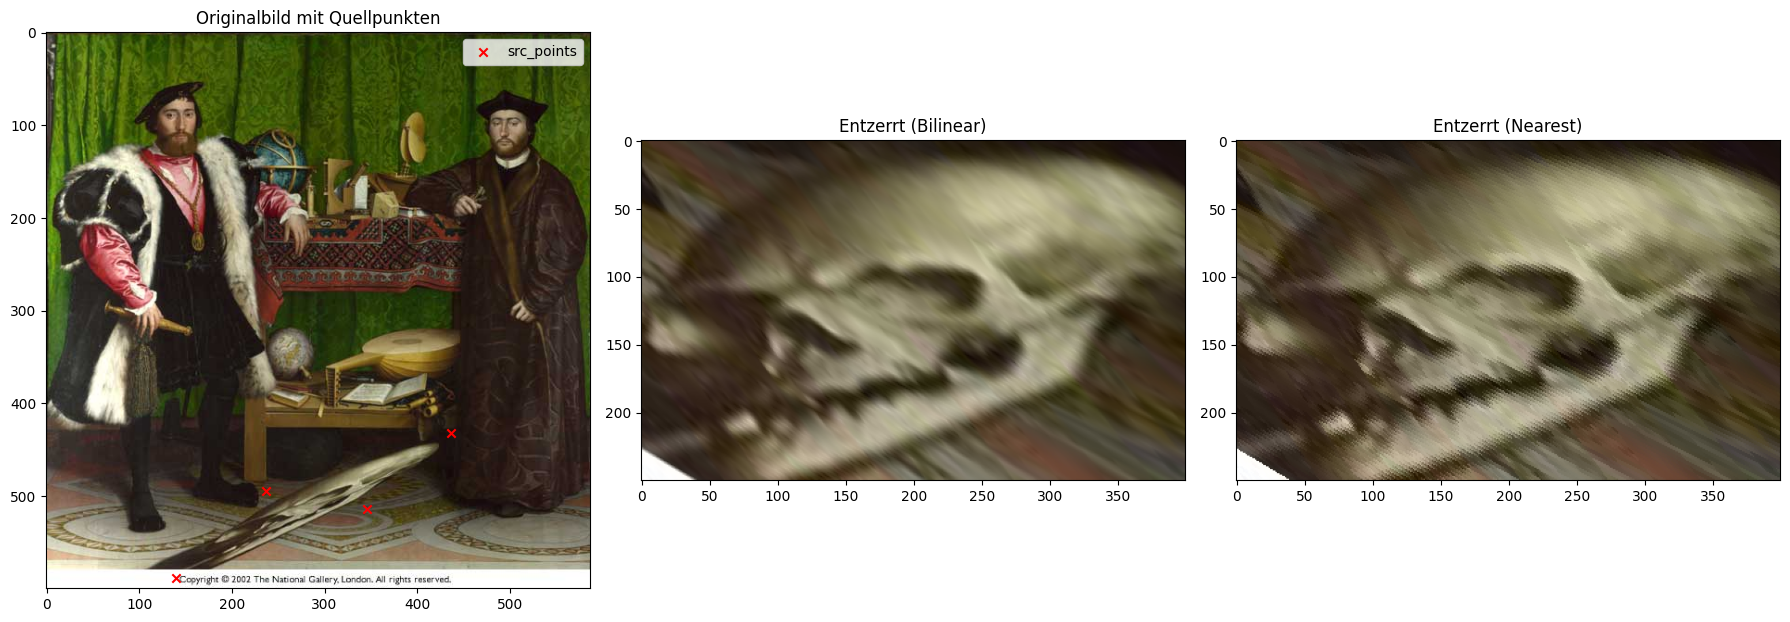

In [4]:
ambassadors = cv2.imread('ambassadors.jpg', cv2.IMREAD_COLOR)
ambassadors = cv2.cvtColor(ambassadors, cv2.COLOR_BGR2RGB)

# Funktion zur perspektivischen Entzerrung 
def rectify_skull(image, src_points, dst_points, interpolation='bilinear'):
    # Konvertiere Interpolationstyp
    if interpolation == 'nearest':
        interp_flag = cv2.INTER_NEAREST
    elif interpolation == 'bilinear':
        interp_flag = cv2.INTER_LINEAR
    else:
        raise ValueError("Interpolation must be 'nearest' or 'bilinear'")
    
    # Berechne Homographie
    H, status = cv2.findHomography(src_points, dst_points)
    
    if H is None:
        raise RuntimeError("Homographie konnte nicht berechnet werden. Prüfe die Punktwahl.")

    print("Homographie-Matrix:\n", H)

    # Zielgröße (Breite/Höhe aus dst_points berechnen)
    width = int(np.max(dst_points[:, 0]) - np.min(dst_points[:, 0]))
    height = int(np.max(dst_points[:, 1]) - np.min(dst_points[:, 1]))

    # Wende Transformation an
    rectified = cv2.warpPerspective(image, H, (width, height), flags=interp_flag)

    return rectified

# === Quellenpunkte: Schädelbereich (manuell geschätzt) ===
src_points = np.array([
    [237, 495],  # oben links — schräg am verzerrten Schädel
    [436, 432],  # oben rechts
    [346, 514],  # unten rechts
    [140, 588]   # unten links
], dtype=np.float32)

dst_points = np.array([
    [0, 0],
    [400, 0],
    [400, 250],
    [0, 250]
], dtype=np.float32)

# Entzerrung
rectified_bilinear = rectify_skull(ambassadors, src_points, dst_points, interpolation='bilinear')
rectified_nearest = rectify_skull(ambassadors, src_points, dst_points, interpolation='nearest')

# Anzeige der Ergebnisse
plt.figure(figsize=(18, 6))

# Originalbild mit markierten Punkten
plt.subplot(1, 3, 1)
plt.imshow(ambassadors)
plt.scatter(src_points[:, 0], src_points[:, 1], color='red', marker='x', label='src_points')
plt.title('Originalbild mit Quellpunkten')
plt.legend()

plt.subplot(1, 3, 2)
plt.imshow(rectified_bilinear)
plt.title('Entzerrt (Bilinear)')

plt.subplot(1, 3, 3)
plt.imshow(rectified_nearest)
plt.title('Entzerrt (Nearest)')

plt.tight_layout()
plt.show()


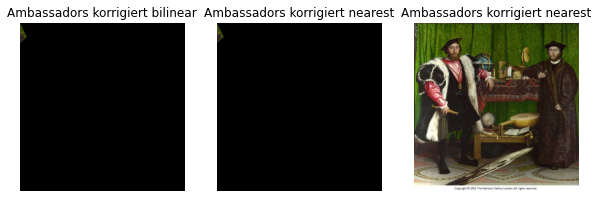

In [15]:
# Ergebnisse anzeigen
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Ambassadors korrigiert bilinear")
plt.imshow(ambassadors_corrected_bilinear)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Ambassadors korrigiert nearest")
plt.imshow(ambassadors_corrected_nearest)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Ambassadors korrigiert nearest")
plt.imshow(ambassadors)
plt.axis("off")



plt.show()